# Pymaceuticals Inc.
---

### Analysis

- Based on this 45 day test, Capomulin is the second most reliable drug to administer for squamous cell carcinoma (SCC) slightly behind Ramicane given its mean, median, var, std dev, and sem.

- A random test of mouse L509 shows that tumor volume decreases by 8 mm3 between days 20 and 35, indicating the potential efficacy window.

- The heavier the mice, the less effective Capomulin becomes, indicating a dose adjusment based on weight.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1 = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.
mice_count = len(df1["Mouse ID"].value_counts())
mice_count

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1[df1.duplicated()]["Mouse ID"]

909    g989
Name: Mouse ID, dtype: object

In [50]:
df1[df1["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df1[df1["Mouse ID"]!= "g989"]
df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(df2["Mouse ID"].value_counts())
mice_count_clean

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = df2.groupby(df2["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = df2.groupby(df2["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = df2.groupby(df2["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor = df2.groupby(df2["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stderr_tumor = df2.groupby(df2["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


df3 = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                   "Median Tumor Volume": median_tumor,
                   "Tumor Volume Variance": var_tumor,
                   "Tumor Volume Std. Dev.": stddev_tumor,
                   "Tumor Volume Std. Err.": stderr_tumor
                   })
df3

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

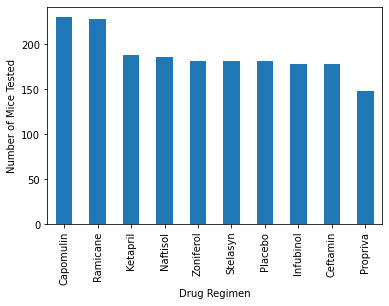

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_count = df2["Drug Regimen"].value_counts()
bar = drug_count.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

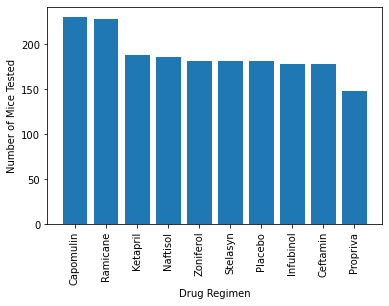

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values
plt.bar(x_axis,y_axis)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

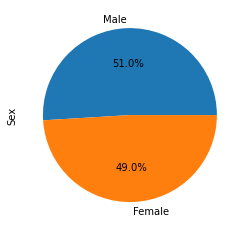

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_pie = df2["Sex"].value_counts()

gender_pie.plot(kind="pie" ,autopct= "%1.1f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x1eeebfdde08>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

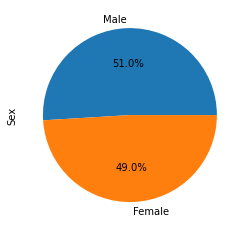

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.ylabel("Sex")
plt.pie(gender_pie,autopct="%1.1f%%",labels = labels)

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = df2.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df4 = tumor_vol.reset_index()
print(len(df4))
df4

248


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = df4.loc[df4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vol.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


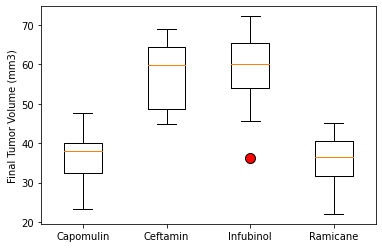

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

marker = dict(markerfacecolor = "red", markersize=10)
fig1, ax1=plt.subplots()
# ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(final_tumor_vol, labels= drugs, flierprops = marker)
plt.show()

## Line and Scatter Plots

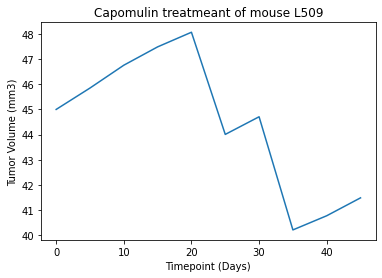

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

df5 = df2.loc[df2["Drug Regimen"] == "Capomulin", :]
line = df5.loc[df5["Mouse ID"] == "l509",:]
line.head()
x_axis2 = line["Timepoint"]
tumor_size = line["Tumor Volume (mm3)"]

plt.plot(x_axis2, tumor_size)
plt.title("Capomulin treatmeant of mouse L509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

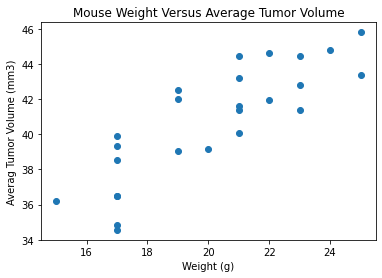

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_cap_vol = df5.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-value (correlation) between mouse weight and the average tumor is 0.84.


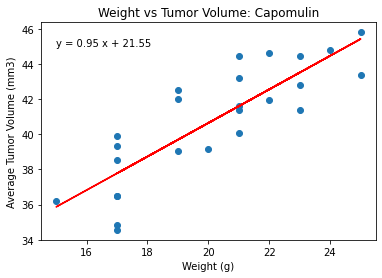

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The r-value (correlation) between mouse weight and the average tumor is {round(correlation[0],2)}.")

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume: Capomulin")
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(15,45))
plt.show()
